In [74]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

In [75]:
def addAtomIndices(mol):
    for i, a in enumerate(mol.GetAtoms()):
        a.SetAtomMapNum(i)

In [76]:
m = Chem.MolFromSmiles("CC[C@H](C1=CC=CC2=C1C=CC=C2)C")
m1 = Chem.MolFromInchi("InChI=1S/C14H16/c1-3-11(2)13-10-6-8-12-7-4-5-9-14(12)13/h4-11H,3H2,1-2H3/t11-/m1/s1")
m = Chem.rdmolfiles.MolFromPDBFile("/home/jramos/PycharmProjects/MStoLAGROAM/data/n-hexane.pdb", removeHs=False)
m1 = Chem.rdmolfiles.MolFromPDBFile("/home/jramos/PycharmProjects/MStoLAGROAM/data/n-hexane_other.pdb", removeHs=False)

In [77]:
Chem.MolToSmiles(m) == Chem.MolToSmiles(m1)

True

In [78]:
m_neworder = tuple(zip(*sorted([(j, i) for i, j in enumerate(Chem.CanonicalRankAtoms(m))])))[1]

In [79]:
m1_neworder = tuple(zip(*sorted([(j, i) for i, j in enumerate(Chem.CanonicalRankAtoms(m1))])))[1]

In [80]:
m_neworder == m1_neworder

False

In [81]:
addAtomIndices(m)

In [82]:
addAtomIndices(m1)

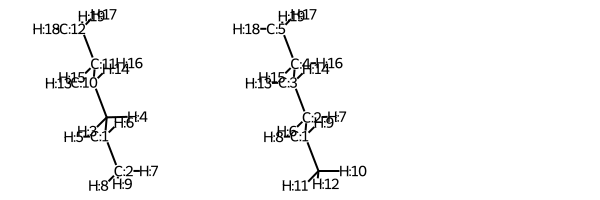

In [83]:
MolsToGridImage((m, m1))

In [84]:
m_renum = Chem.RenumberAtoms(m, m_neworder)

In [85]:
m1_renum = Chem.RenumberAtoms(m1, m1_neworder)

In [86]:
addAtomIndices(m_renum)

In [87]:
addAtomIndices(m1_renum)

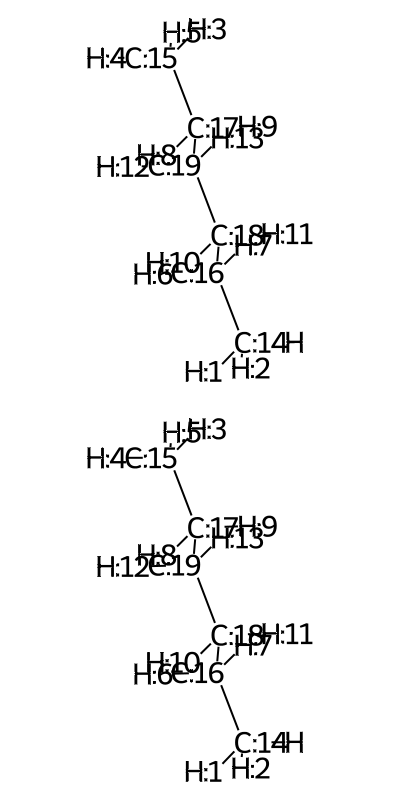

In [94]:
MolsToGridImage((m_renum, m1_renum),  molsPerRow=1, subImgSize=(400, 400))